In [ ]:
########################
# Analysis of Livorno data
########################
import warnings
warnings.filterwarnings('ignore')

from pylab import *
import psycopg2
%timeit
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set(font_scale=1.0)
%matplotlib inline

###### Connect to db
connection = connect(host='', port=5432)
livorno_data = pd.read_csv(livorno_data, '../src/output/livorno_data.csv')

In [16]:
# Get data for summer 2016
June = livorno_data[livorno_data.Month == 'Giu']
July = livorno_data[livorno_data.Month == 'Lug']
August = livorno_data[livorno_data.Month == 'Ago']
September = livorno_data[livorno_data.Month == 'Set']

## How many passengers were there per month of summer 2016?
june_pass_ts = pd.DataFrame(June.groupby(['Arrival_Date']).sum()['PassTrans'])
june_pass_ts['date'] = june_pass_ts.index
july_pass_ts = pd.DataFrame(July.groupby(['Arrival_Date']).sum()['PassTrans'])
july_pass_ts['date'] = july_pass_ts.index
august_pass_ts = pd.DataFrame(August.groupby(['Arrival_Date']).sum()['PassTrans'])
august_pass_ts['date'] = august_pass_ts.index
sept_pass_ts = pd.DataFrame(September.groupby(['Arrival_Date']).sum()['PassTrans'])
sept_pass_ts['date'] = sept_pass_ts.index

# How many people arriving in June, July, August, September?
print('June: ', june_pass_ts['PassTrans'].sum())
print('July: ', july_pass_ts['PassTrans'].sum())
print('August: ', august_pass_ts['PassTrans'].sum())
print('September: ', sept_pass_ts['PassTrans'].sum())
print('Total Passengers: ', livorno_data['PassTrans'].sum())

('June: ', 126762)
('July: ', 129944)
('August: ', 137163)
('September: ', 124500)
('Total Passengers: ', 518369)


In [18]:
# How many ships arriving per day, on average?
daily_ships = pd.DataFrame(livorno_data.groupby(['Arrival_Date']).count()['Ship'])
print('Average ships arriving per day:', daily_ships.Ship.mean().round())

('Average ships arriving per day:', 2.0)


In [20]:
# How many ships total
print('Total number of ships over summer:', livorno_data.Ship.count())

('Total number of ships over summer:', 232)


In [26]:
# Avg passengers per day arriving in Livorno
pass_ts = pd.DataFrame(livorno_data.groupby(['ArrivalTime']).sum()['PassTrans'])
pass_ts['time'] = pass_ts.index

print('Average number of passengers arriving daily in Livorno:', livorno_data.PassTrans.mean())

('Average number of passengers arriving daily in Livorno:', 2234.3491379310344)


In [6]:
# How many total passengers over summer? 
livorno_data.PassTrans.sum()

518369

In [7]:
#### Total days & hours in port
departtimes = pd.to_datetime(livorno_data['DepartureTime'], format="%H:%M:%S")
arrivaltimes = pd.to_datetime(livorno_data['ArrivalTime'], format="%H:%M:%S")
livorno_data['hours_in_port'] = departtimes - arrivaltimes

departdays = pd.to_datetime(livorno_data['Departure_Date'])
arrivaldays = pd.to_datetime(livorno_data['Arrival_Date'])
livorno_data['days_in_port'] = departdays - arrivaldays

grouped_by_arrivaltime = livorno_data.groupby(['ArrivalTime']).sum()
grouped_by_departuretime = livorno_data.groupby(['DepartureTime']).sum()
grouped_by_arrivaltime

## Most boats arrive morning, leave in late evening

,_unnamed,Number,Lung,Pesc,Passengers,PassTrans,PassOver,PassTransOver,PassSbarCro,PassSbarCroMin0_11,PassSbarCroMin12_18,PassSbar,PassImbarCro,PassImbarCroMin0_11,PassImbarCroMin12_18,PassImbar,PassTot,Navi_Navi_tot,Pass_Pass_tot
ArrivalTime,,,,,,,,,,,,,,,,,,,
00:15:00,2900,8,472,40.0,416,0,NaN,0,368.0,NaN,NaN,368,343.0,NaN,NaN,343,711,8,0.231898
05:00:00,166,1,290,7.8,1800,2122,NaN,2122,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2122,1,0.692107
05:30:00,1112,4,1293,35.6,16500,16220,NaN,16220,NaN,NaN,NaN,0,NaN,NaN,NaN,0,16220,4,5.290280
05:45:00,4265,16,5140,141.9,63300,70364,NaN,70364,NaN,NaN,NaN,0,NaN,NaN,NaN,0,70364,16,22.949772
06:00:00,20783,95,26374,751.0,213450,244874,525.0,245399,NaN,NaN,NaN,0,NaN,NaN,NaN,0,245399,95,80.038813
06:30:00,3011,27,6692,198.2,50350,58941,NaN,58941,NaN,NaN,NaN,0,NaN,NaN,NaN,0,58941,27,19.224070
06:45:00,179,1,180,6.0,650,641,641.0,1282,NaN,NaN,NaN,0,NaN,NaN,NaN,0,1282,1,0.418134
07:00:00,7310,45,10796,322.5,71350,71503,655.0,72158,1346.0,256.0,129.0,1731,1330.0,238.0,100.0,1668,75557,45,24.643509
07:30:00,1149,8,1694,53.6,12300,13637,645.0,14282,NaN,NaN,NaN,0,NaN,NaN,NaN,0,14282,8,4.658187


In [8]:
# How many passengers on ships that stay 2 days?
two_day_ships = livorno_data[livorno_data['days_in_port'] == '2 days']
two_day_ships['PassTrans'].sum()

249

In [9]:
### How many overnight boats? 8
overnight_boats = livorno_data[(livorno_data['PassOver']).notnull()]
not_overnight_boats = livorno_data[(livorno_data['PassOver']).isnull()]

# How many people total on these overnight boats? 3990
overnight_boats.PassTrans.sum()

3990

In [10]:
# On overnight boats, do passengers sleep on the boats? YES!
sleep_on_ship = overnight_boats.ix[:, ['PassOver','PassTrans']]
sleep_on_ship

,PassOver,PassTrans
17,1022.0,1022
21,502.0,502
41,216.0,216
114,645.0,645
117,655.0,655
118,641.0,641
162,276.0,276
216,33.0,33


In [11]:
mean_time = not_overnight_boats['hours_in_port'].mean()
max_time = not_overnight_boats['hours_in_port'].max()

print(mean_time)
print(max_time)

0 days 12:47:51.428571
0 days 17:25:00


In [12]:
### Who are the main shipowners?
livorno_data['Ship'].value_counts()

Norwegian Epic             18
Sovereign                  17
Msc Armonia                15
Carnival Vista             14
Zenith                     12
Aida Blu                   12
Norwegian Spirit           10
Oceana                      9
Tui Discovery               8
Arethusa                    8
Royal Princess              7
Celebrity Equinox           6
Brilliance of the Seas      6
Disney Magic                6
Eurodam                     6
Oosterdam                   6
Azamara Journey             5
Riviera                     5
Thomson Majesty             5
Celebrity Constellation     4
Queen Victoria              4
Seven Seas Explorer         3
Emerald Princess            3
Seabourn Sojourn            3
Navigator of the Seas       3
Independence                3
Star Breeze                 2
Saga Pearl II               2
Seven Seas Navigator        2
Silver Cloud                2
Viking Sea                  2
Stad Amsterdam              2
Sea Dream  1                2
Sirena    

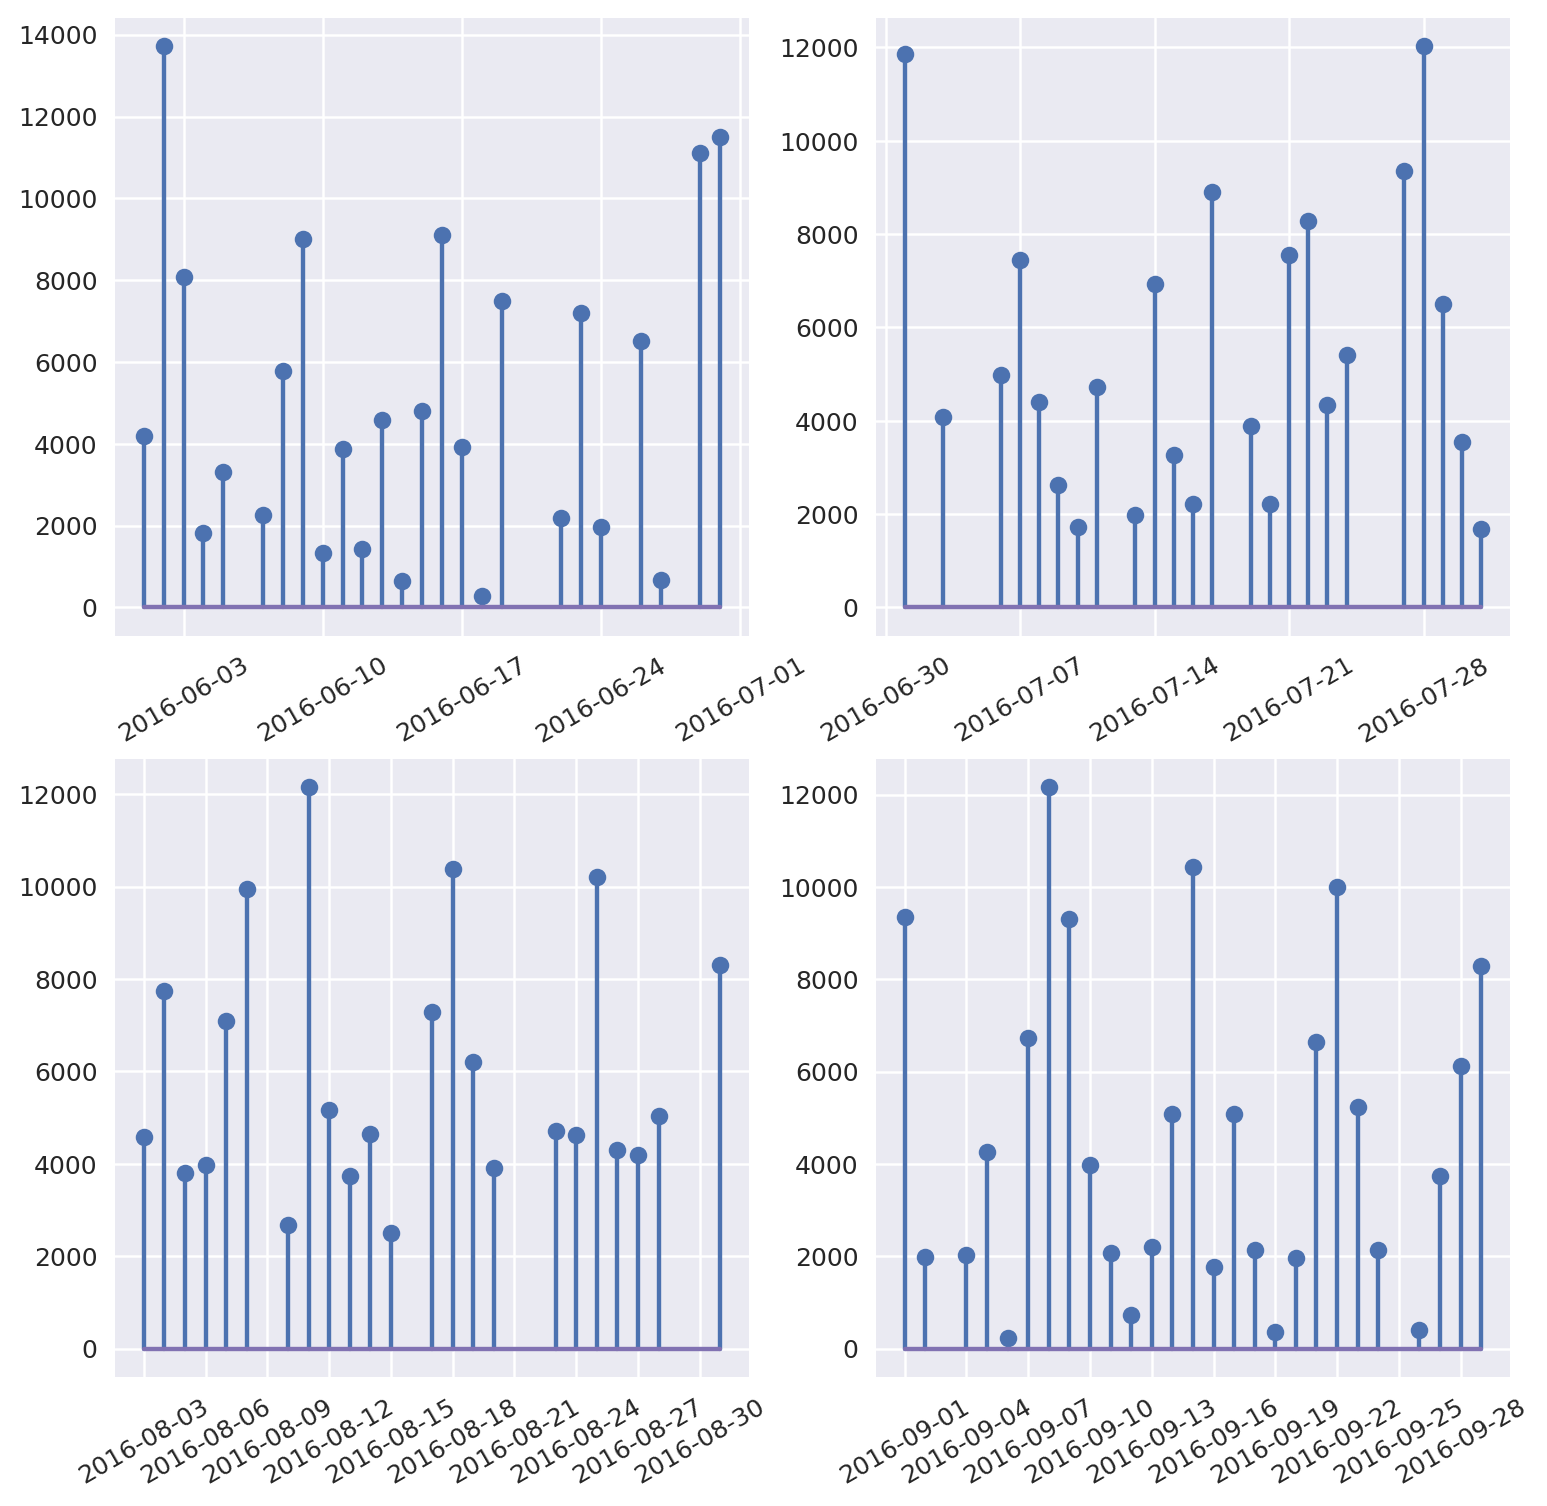

In [13]:
plt.close('all')
f, ax = plt.subplots(2,2, figsize=(10,10), dpi=180, facecolor='w', edgecolor='k')
ax[0,0].stem(june_pass_ts['date'],june_pass_ts['PassTrans'])
ax[0,1].stem(july_pass_ts['date'],july_pass_ts['PassTrans'])
ax[1,0].stem(august_pass_ts['date'],august_pass_ts['PassTrans'])
ax[1,1].stem(sept_pass_ts['date'],sept_pass_ts['PassTrans'])
plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False, rotation=30)
plt.setp([a.get_xticklabels() for a in ax[:, 1]], visible=True, rotation=30)
plt.setp([a.get_xticklabels() for a in ax[:, 0]], visible=True, rotation=30)
plt.setp([a.get_xticklabels() for a in ax[1, :]], visible=True, rotation=30)

plt.show()